# Notebook 4: Neural Networks

## 1. Einführung in Neuronale Netze
Mit dem Thema _neuronale Netze_ sind wir an einem viel beforschten und sehr zentralen Konzept des Machine Learnings angekommen. Neuronale Netze sind in der Lage, komplexe Zusammenhänge aus Daten zu lernen und werden in zahlreichen Anwendungen eingesetzt – von der Bildverarbeitung, über die Suche nach neuen Molekülen, bis hin zur Steuerung technischer Systeme.

Doch was steckt eigentlich hinter einem neuronalen Netz? Im Kern sind sie eine Verallgemeinerung von linearen Modellen, die wir bereits kennengelernt haben, auf nichtlineare Zusammenhänge, sodass sie wesentlich komplexere Muster erkennen können. Ein einfaches neuronales Netz kann als eine Art selbstanpassendes Regelsystem betrachtet werden: Es nimmt Eingaben entgegen, verarbeitet sie durch mathematische Operationen und passt seine Parameter durch einen Algorithmus so an, dass es aus Erfahrung lernt. Klingt imposant, aber wir werden in diesem Notebook sehen, dass neuronale Netze "nur" flexiblere Regressionsmaschinen sind. Das bedeutet, dass wir nicht mehr viele Zutaten brauchen, um die Natur neuronaler Netze zu verstehen.

#### Warum sind neuronale Netze im Maschinenbau relevant?
Viele Probleme in der Ingenieurspraxis lassen sich durch neuronale Netze effizient lösen, etwa:

- Fehlererkennung in Produktionsprozessen: Ein neuronales Netz kann Sensordaten analysieren und frühzeitig Anomalien in Maschinen erkennen. ([A Review of Neural Networks for Anomaly Detection](https://www.researchgate.net/publication/365099989_A_Review_of_Neural_Networks_for_Anomaly_Detection))
- Optimierung von Steuerungsparametern: Statt starre Regelungsstrategien zu verwenden, kann ein neuronales Netz lernen, wie es Systeme adaptiv optimiert. ([Neural Networks for Control](https://hagan.okstate.edu/HaganDemuthACC99.pdf))
- Physikalische Modellierung: Durch die Berücksichtigung physikalischer Gesetze in neuronalen Netzen können diese eine große Vielfalt an komplexen physikalischen Problemen mit hoher Genauigkeit lösen. ([Scientific Machine Learning through Physics-Informed Neural Networks: Where we are and What’s next](https://arxiv.org/pdf/2201.05624))

#### Was erwartet dich in diesem Notebook?
In diesem Notebook werden wir das einfachste neuronale Netz – das Single Layer Perceptron (SLP) – untersuchen und schrittweise verstehen, wie es funktioniert. Wir beginnen mit den Grundbausteinen eines neuronalen Netzes, schauen uns an wie es aus Inputs Outputs generiert, wie es lernt und visualisieren diesen Lernprozess interaktiv mit Widgets. Im nächsten Notebook werden wir dann das gelernte Grundlagenwissen praktisch anwenden und selber ein SLP mit gängigen Python Libraries bauen.

## 2. Das Perzeptron

Was das Atom für die Physik ist, ist das Perzeptron für künstliche neuronale Netze. Künstliche neuronale Netze (engl. artificial neural networks (ANNs)) bestehen aus künstlichen Neuronen, die sich – zumindest in der Grundidee – an biologischen Nervenzellen orientieren. Das Perzeptron ist das einfachste Modell eines künstlichen Neurons und wurde bereits 1958 von Frank Rosenblatt entwickelt. Es kann genutzt werden, um auf Basis von Eingaben binäre Entscheidungen zu treffen. Das wort "Perzeptron" ist eine Kombination aus zwei Wörtern:
- Perception: *engl*, Wahrnehmung
- Neuron: Eine Nervenzelle, die Informationen in Form von (chemischen und elektrischen) Signalen weiterleitet

Ein Perzeptron arbeitet nach folgendem Prinzip
1. Es nimmt eine Reihe von Eingaben entgegen (z. B. Sensordaten).  
2. Diese Eingaben werden gewichtet und zu einer einzigen Zahl kombiniert.  
3. Das Perzeptron vergleicht diese Zahl mit einem Schwellwert und trifft darauf basierend eine Entscheidung: **ja/nein**, **0/1**, **wahr/falsch**.  

Der vereinfachte Aufbau eines Perzeptrons ist daher folgender
<center><img src = "https://www.sciencebuddies.org/WuSog9NdWrI_ssKxVHAcFhnVavw=/1280x720/-/https/www.sciencebuddies.org/cdn/Files/19698/9/perceptron-thumbnail.jpg" width="600" height="400" /></center>

Das Perzeptron ist also ein künstliches Neuron, das irgendeine Art von Wahrnehmung hat (z.B. die Helligkeitswerte der Pixel eines Bilds oder die Koordinaten eines Balls im Raum) und ein Signal basierend auf diesen Inputs weitergibt. Diese Weitergabe kann an andere Perzeptronen erfolgen, oder direkt als Ausgabe eines Outputs. Ein einzelnes Perzeptron kann also durchaus als abgeschlossenes System betrachtet werden, das im Grunde versucht, eine Entscheidung oder Vorhersage zu treffen. In diesem Fall nennt man das Perzeptron ein Single Layer Perceptron (SLP). Zum Beispiel könnte ein autonomes Auto auf einem SLP basieren.

### Beispiel: Bremsen oder nicht bremsen? Das ist hier die Frage.

Stellen wir uns ein vereinfachtes Modell für ein autonomes Fahrzeug vor. Das Auto muss entscheiden, ob es bremsen soll, abhängig von zwei Eingaben:  
1. **Ampel rot?** (Ja/Nein)  
2. **Auto vor uns bremst?** (Ja/Nein)  

Die Entscheidungsregel könnte lauten:  
- Falls die Ampel rot ist, soll das Auto bremsen.  
- Falls das Auto vor uns bremst, soll unser Auto ebenfalls bremsen.  
- Falls weder die Ampel rot ist noch das vordere Auto bremst, soll das Auto weiterfahren.  

Das Perzeptron kann diese Logik durch eine einfache Regel abbilden. Es verarbeitet die beiden Eingaben und gibt eine von zwei möglichen Antworten aus: 1 (bremsen) oder 0 (nicht bremsen)  

| Ampel rot? | Auto bremst? | Entscheidung |
|------------|-------------|-------------|
| Nein (0)   | Nein (0)     | Fährt weiter (0) |
| Ja (1)     | Nein (0)     | Bremst (1) |
| Nein (0)   | Ja (1)       | Bremst (1) |
| Ja (1)     | Ja (1)       | Bremst (1) |

Diese Tabelle zeigt ein klassisches Entscheidungsproblem, das ein Perzeptron modellieren kann. Es setzt eine einfache Regel um: Bremsen, sobald _mindestens eine_ der beiden Bedingungen erfüllt ist. Wer gut aufgepasst hat sieht, dass unser Beispiel eigentlich nur ein logisches OR-Gate darstellt. Warum braucht man dafür ein Perzeptron? Die Stärke des Perzeptrons liegt darin, dass es sich (1.) auf veränderte Daten dynamisch anpassen kann, indem es trainiert wird und (2.) wesentlich mehr Inputs als zwei Wertepaare nehmen kann, um eine Entscheidung zu treffen (solange die Daten [linear separierbar](https://de.wikipedia.org/wiki/Lineare_Separierbarkeit) sind). Man stelle sich vor, jede Situation im Straßenverkehr in einem logischen Gate codieren zu wollen. Das wäre genauso unmöglich wie ressourcenaufwändig. Das folgende Diagramm zeigt unsere Entscheidungsregel graphisch, wobei grün für "bremsen" steht und rot für "weiterfahren":

<center><iframe src="https://drive.google.com/file/d/1al-NLWJEzmwjDdg_eZ10GuihgZJeku8Y/preview" width="400" height="400"></iframe></center>

**Was kommt als Nächstes?**  
Bisher haben wir nur beschrieben, **was** ein Perzeptron macht. Doch **wie** verarbeitet es Eingaben mathematisch? Dafür brauchen wir zwei wichtige Konzepte: **Gewichte und Bias.** Das schauen wir uns im nächsten Abschnitt an. 

### Gewichte und Bias
Fangen wir mit einem Gedankenexperiment an: Nehmen wir an, wir wollen vorhersagen, ob es heute regnen wird (Ja oder Nein) basierend auf folgenden Tatsachen: 
- $x_1$: "Hat es gestern geregnet?"
- $x_2$: "Ist es Sommer?" und 
- $x_3$: "Hast du heute gefrühstückt?"

Es ist nicht schwierig sich vorzustellen, dass zwei dieser Variablen für die Beantwortung unserer Frage, ob es heute regnet, ein höheres Gewicht haben sollten als die dritte. 
Wenn wir aus gegebenen Inputs also einen Output generieren wollen, dann müssen wir berücksichtigen, dass nicht alle Inputs für unsere Vorhersage gleich wichtig sind. Wenn wir nun ein Perzeptron die gleiche Aussage ($y$: "Wird es heute regnen?") bewerten lassen wollen, werden daher die Inputs mit Gewichten (engl., weights) multipliziert.

Diese Gewichte sind **lernbar**, können sich also im Lernprozess verändern! Im idealen Fall würde das Perzeptron der Variable $x_3$ nach einem erfolgreichen Lernprozess also ein Gewicht von 0 beimessen, da die Regenwahrscheinlichkeit nun wirklich nicht oft mit dem Frühstück korrelliert. Im Allgemeinen wissen wir allerdings nicht, welche Variablen wie stark gewichtet werden sollen und sollten daher anfangs allen Variablen ein ähnliches Gewicht beimessen.

Wie genau wird diese Gewichtung nun vorgenommen? Betrachten wir unser sehr einfaches Beispiel des Perzeptrons mit unseren drei Inputs ($x_1$, $x_2$ und $x_3$) und einem Output ($y$: "Wird es heute regnen?"). Jeder dieser Inputs $x_i$ wird mit einem Gewicht $w_i$ gewichtet und dann zu einer einzigen Vorhersage zusammengefasst. Das tun wir, indem wir alle Inputs mit dem jeweiligen Gewicht $w_i$ multiplizieren und aufaddieren:
$$
\begin{equation}
\hat{y} = \sum_{i=1}^n w_i x_i \tag{1}
\end{equation}
$$
für alle $i \in \{1, 2, 3\}$. Das ist aber genau die Definition des Skalarprodukts. Es bietet sich in diesem Fall also an, die Inputs in den Vektor $\vec{x}$ und die Gewichte in den Vektor $\vec{w}$ zu kondensieren, sodass wir schreiben können $\hat{y} = \vec{w} \cdot \vec{x}$. Wir schreiben hier $\hat{y}$, um unsere Vorhersage durch das SLP eindeutig vom "wahren" vorherzusagenden Wert $y$ zu trennen.

In vielen Fällen haben wir allerdings mehr als nur einen Output ($y_1$, $y_2$, ..., $y_j$). Dies bedeutet, dass jeder Input (Index $i$) für jeden Output (Index $j$) ein anderes Gewicht hat, da jeder Input für jeden Output mehr oder weniger Bedeutung haben kann. Für unser Beispiel der Regenvorhersage könnte der Gewichtungsvektor etwa so aussehen:
$\vec{w_{1,i}} = \begin{pmatrix}
0.67 & 0.31 & 0.02
\end{pmatrix}$, da die ersten Variablen wichtiger sind als die letzte. Nehmen wir nun eine zweite vorherzusagende Variable dazu: "Wie gut geht es mir heute?" ($y_2$), dann würden die Inputs eine andere Gewichtung annehmen, zum Beispiel diese: ${\vec{w_{2,i}} = \begin{pmatrix}
0.1 & 0.4 & 0.4
\end{pmatrix}}$. Insgesamt benötigen wir also für $n$ Inputs und $m$ Outputs eine Gewichtungsmatrix der Dimension $m \times n$:
$$
W = 
\begin{pmatrix} 
\text{---} & \vec{w_{1,i}} & \text{---} \\
\text{---} & \vec{w_{2,i}} & \text{---}
\end{pmatrix}
=
\begin{pmatrix} 
0.67 & 0.31 & 0.02 \\
0.1 & 0.4 & 0.4 
\end{pmatrix}
$$.
Diese Matrix kann man sich als Stapel aus allen Gewichtungsvektoren (für jeden Output einen) vorstellen. \
Wir haben jetzt fast alles beisammen, um unsere erste Vorhersage mit dem Perzeptron zu treffen. Allerdings fehlt uns noch ein sehr wichtiger Aspekt. Zum jetzigen Zeitpunkt ist unser Output immer gleich 0, wenn alle unsere Inputs gleich 0 sind. Mit anderen Worten: Unsere (im Allgemeinen multidimensionale) Gerade, denn Formel ([1](#mjx-eqn-1)) beschreibt nichts anderes als das, geht immer durch den Ursprung. Dies stellt eine erhebliche(!) Einschränkung dar, welche allerdings einfach durch die Addition eines konstanten Terms, des "Bias", überwunden werden kann. Das folgende Bild stellt am Beispiel eines Perzeptrons mit eindimensionalem Input ($x$) und eindimensionalen Output ($y$) dar, welchen Unterschied der Bias-Term ausmachen kann, wenn es um die Vorhersagegenauigkeit bei einer einfachen Klassifikation geht:

<center><iframe src="https://drive.google.com/file/d/1RJ6MYo1KE30aPNrp5cBqWptIm1KJIsFw/preview" width="600" height="300" allow="autoplay"></iframe></center>

<!-- <center><iframe src="https://drive.google.com/file/d/1_FhzEtXVWzZU0369B3uX2wh47g-va5J3/preview" width="640" height="480" allow="autoplay"></iframe></center>
-->
Man sieht, dass die vom Perzeptron gelernte Entscheidungslinie, die rot und blau trennt, die Daten im zweiten Graphen (mit Bias) wesentlich besser beschreibt, während das erste Perzeptron durch die Einschränkung, dass die Gerade durch den Ursprung gehen muss, viele Punkte falsch klassifiziert. Der Bias-Term spielt also eine wesentliche Rolle, um genaue Vorhersagen zu ermöglichen.
In diesem eindimensionalen Fall ist der Bias lediglich eine Zahl. Hätten wir mehrere Outputs ($y_1$, $y_2$, ..., $y_{m}$), müssten wir für jeden der Outputs eine Zahl addieren. Der Bias ist also ein Vektor der Dimension $m$. Insgesamt erhalten wir also den gewichteten Output:
$$
\hat{y}_j = \sum_{i=1}^n w_{j,i} x_i + b_j
$$ 
für $j \in \{1, \dots, m\}$ oder einfach $\mathbf{\hat{y}} = \mathbf{W} \mathbf{x} + \mathbf{b}$, wobei fett geschriebene Variablen vektorwertig sind und groß geschriebene Variablen Matrizen. Für die folgenden Betrachtungen machen wir es uns aber so einfach wie möglich und betrachten nur den Fall von eindimensionalem Output ($m=1$). Weiterhin wollen wir die gewichtete Summe hier zwischenzeitlich mit $z$ bezeichnen, da es sich noch nicht um den endgültigen Output handelt. Die Variablen $z$ und $b$ werden somit einfach zu rellen Zahlen, während $\mathbf{W}$ und $\mathbf{x}$ jeweils zum Zeilen- und Spaltenvektor der Input-Dimension $n$ werden. Wir haben also für eindimensionalen Output und n-dimensionalen Input die gewichtete Summe $z = \mathbf{w}^\top \mathbf{x}+b$.

### Aktivierungsfunktion  
Nachdem wir nun gesehen haben, wie das Perzeptron aus den Inputs $x_i$ eine gewichtete Summe berechnet, stellt sich die Frage: Wie wird daraus eine Entscheidung abgeleitet? Genau hier kommt die _Aktivierungsfunktion_ ins Spiel. Sie bestimmt, wie der finale Output des Perzeptrons basierend auf dieser Summe erzeugt wird.

Die einfachste Möglichkeit wäre, den Output direkt als gewichtete Summe zu belassen. Das ist genau das, was bei _Regressionsproblemen_ gemacht wird, wo ein beliebiger reeller Wert vorhergesagt werden soll – etwa die Temperatur am nächsten Tag oder der Umsatz eines Unternehmens. In solchen Fällen wird oft die lineare Aktivierungsfunktion $f(z) = z$ oder die ReLU-Funktion $f(z) = \max(0, z)$ verwendet, da sie auf ganz $\mathbb{R}$ oder $\mathbb{R}^+$ definiert sind, also alle diese Werte annehmen oder "vorhersagen" können.

In vielen Anwendungen – insbesondere bei Klassifikationsproblemen – möchten wir jedoch eine Entscheidung treffen, also etwa die Frage beantworten: „Regnet es morgen? Ja oder Nein?“. Hierbei reicht es nicht aus, einfach einen beliebigen Zahlenwert auszugeben. Stattdessen wird der berechnete Wert durch eine Funktion geschickt, die das Ergebnis in eine geeignete Form bringt. 

Eine der einfachsten Aktivierungsfunktionen für binäre Klassifikationsprobleme ist die Stufenfunktion $\Theta(z)$, die nur zwei mögliche Werte zurückgibt:  
- 0, wenn der berechnete Wert unter einem Schwellenwert (meistens 0) liegt 
- 1, wenn er diesen erreicht oder überschreitet

Alternativ kann man die **Sigmoid-Funktion** $\Sigma(z)$ verwenden, die kontinuierliche Werte zwischen 0 und 1 liefert. Dadurch kann sie nicht nur Entscheidungen treffen, sondern auch Wahrscheinlichkeiten oder abgestufte Antworten erzeugen. In unserem Beispiel der Regenvorhersage wäre die Stufenfunktion sinnvoll, wenn wir eine harte Entscheidung („Ja, es wird regnen“ oder „Nein, es wird nicht regnen“) treffen wollen. Die Sigmoid-Funktion wäre besser geeignet, wenn wir eine Wahrscheinlichkeitsabschätzung wünschen, also etwa sagen wollen: *„Mit 80 % Wahrscheinlichkeit wird es morgen regnen.“*  

Die mathematischen Definitionen der beiden Funktionen und ihre Graphen sind unten zu sehen:  

$$
\Theta(z) =
\begin{cases} 
0, & \text{falls } z < 0 \\ 
1, & \text{falls } z \geq 0
\end{cases} \tag{a}
$$

$$
\Sigma(z) = \frac{1}{1 + \mathrm{e}^{-z}} \tag{b}
$$

<center><img src = "https://www.researchgate.net/publication/257219838/figure/fig3/AS:297572691398660@1447958266825/a-Step-function-and-b-sigmoid-function.png" width="600" height="400" /></center>

Beachtet, dass der einzige Unterschied im _Aufbau_ eines SLPs, das für Klassifikation oder für Regression angewandt wird, in der Wahl der Aktivierungsfunktion liegt!

### Lineare Separierbarkeit – Eine Einschränkung des Perzeptrons  
Vorhin wurde bereits die **Lineare Separierbarkeit** erwähnt. Sie stellt die größte Einschränkung vom Perzeptron bei der Klassifikation dar. Wie wir bereits gesehen haben, berechnet ein SLP seine Vorhersage mittels einer Gewichtung und eines anschließenden Vergleichs mit dem Bias-Wert $b$. Letztenendes ist die Entscheidung eines SLPs also von der Form $w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b \lessgtr 0$, was einfach den n-dimensionalen Raum in zwei "gerade" Hälften trennt. Alles über 0 ist "Ja", alles unter 0 ist "Nein". Lineare Separierbarkeit ist nun gegeben, wenn alle Daten, die zu zwei verschiedenen Klassen gehören, im Parameterraum tatsächlich durch eine "Gerade" getrennt werden können (2D: Gerade, 3D: Ebene, nD: Hyperebene). Unser erstes Problem vom autonomen Auto ist also linear separierbar (und damit vom SLP lösbar), falls eine Gerade existiert, die alle roten Punkte von den grünen trennt. In dem Fall von oben ist dies durchaus möglich (geht ruhig zurück und versucht eine Gerade zu finden, die die Daten trennt). Falls dies aber nicht möglich ist, benötigt man komplexere Modelle. Ein klassisches Beispiel für ein nicht linear separierbares Problem ist das XOR-Problem, das in der folgenden Grafik dargestellt ist:  
<center><iframe src="https://drive.google.com/file/d/15vvJGCW9ndBORe0f_Xv3R8EVqrKzpPsy/preview" width="400" height="400"></iframe></center>

Hier gibt es keine einzelne Gerade, die alle grünen Punkte von allen roten Punkten trennt und somit wird das SLP daran scheitern eine erfolgreiche Entscheidungsregel zu finden. Es wird immer einen nicht zu vernachlässigenden Anteil von Fehlklassifikationen geben. Die Einschränkung der linearen Separierbarkeit ist übrigens eine ziemlich große, da viele Problemstellungen nicht einfach linear trennbar sind. Dieses Problem stand am Anfang des ersten "AI Winters" um 1970, infolgedessen Fortschritte im Bereich KI undenkbar schienen und große Förderungseinschnitte für KI-Forschnung veranlasst wurden. Erst mit mehrschichtigen Netzwerken und dem Backpropagation-Algorithmus konnte dieses Problem überwunden werden – ein Thema, das wir in zukünftigen Notebooks noch behandeln werden.  

#### Aufgaben:
- Implementiere die Aktivierungsfunktionen in der folgenden Zelle. Benutze das `math`-Modul oder `numpy`. Wir werden diese Funktionen im nächsten Notebook verwenden. 
- Recherchiere, welche weiteren Aktivierungsfunktionen es gibt und wofür sie angewendet werden.  

<!-- Wie wird nun, basierend auf den Inputs, ein Output erzeugt? Kurz gesagt: Alle Inputs werden erst gewichtet und dann durch eine Funktion geschickt, die einen Wertebereich zwischen 0 und 1 hat. Diese Funktion nennt man Aktivierungsfunktion. Ist die Aktivierungsfunktion beispielsweise eine Stufenfunktion (a), dann ist der Output binär ("0" oder "1"). Ist die Aktivierungsfunktion aber eine Sigmoid-Funktion (b, die kontinuierliche Variante der Stufenfunktion), liegt der Output zwischen 0 und 1, kann aber jeden Wert in diesem Bereich annehmen. In diesem Fall kann man den Stärkegrad des Outputs steuern, oder die Wahrscheinlichkeit einer Vorhersage angeben. In unserem Beispiel wäre es zum Beispiel ratsam, das Anfahr- und Abbremsverhalten kontinuierlich zu steuern, d.h. mit der Sigmoid-Funktion, damit die Insassen eine angenehme Fahrt haben. \
<center><img src = "https://www.researchgate.net/publication/257219838/figure/fig3/AS:297572691398660@1447958266825/a-Step-function-and-b-sigmoid-function.png" width="600" height="400" /></center>

Die Definitionen der Stufenfunktion $\Theta$ und der Sigmoid-Funktion $\Sigma$ sind wie folgt:

$$
\begin{align*}
&\Theta : \mathbb{R} \rightarrow \{0, 1\} \\
&x \to \begin{cases} 0& \text{, falls } x < 0 \\
                     1& \text{, falls } x \geq 0
\end{cases}
\end{align*}
$$

$$
\begin{align*}
&\Sigma : \mathbb{R} \to (0, 1) \\
&x \to \frac{1}{1 + \mathrm{e}^{-x}}
\end{align*}
$$

Vorhin wurde bereits die **Lineare Separierbarkeit** erwähnt. Sie stellt die größte Einschränkung vom Perzeptron dar. Wie wir bereits gesehen haben, berechnet ein SLP seine Vorhersage mittels einer Gewichtung und eines anschließenden Vergleichs mit dem Bias-Wert $b$. Letztenendes ist die Entscheidung eines SLPs also von der Form $w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b \lessgtr 0$, was einfach den n-dimensionalen Raum in zwei "gerade" Hälften trennt. Alles über 0 ist "Ja", alles unter 0 ist "Nein". Lineare Separierbarkeit ist nun gegeben, wenn alle Daten, die zu zwei verschiedenen Klassen gehören, im Parameterraum tatsächlich durch eine "Gerade" getrennt werden können (2D: Gerade, 3D: Ebene, nD: Hyperebene). Unser erstes Problem vom autonomen Auto ist also linear separierbar (und damit vom SLP lösbar), falls eine Gerade existiert, die alle roten Punkte von den grünen trennt. In dem Fall von oben ist dies durchaus möglich (geht ruhig zurück und versucht eine Gerade zu finden, die die Daten trennt). Falls dies aber nicht möglich ist, benötigt man komplexere Modelle. Das ist zum Beispiel beim sogenannten XOR-Problem der Fall, welches im folgendem Bild dargestellt ist:
<center><iframe src="https://drive.google.com/file/d/15vvJGCW9ndBORe0f_Xv3R8EVqrKzpPsy/preview" width="400" height="400"></iframe></center>
Hier gibt es keine einzelne Gerade, die alle grünen Punkte von allen roten Punkten trennt und somit wird das SLP daran scheitern eine erfolgreiche Entscheidungsregel zu finden. Es wird immer einen nicht zu vernachlässigenden Anteil von Fehlklassifikationen geben. Die Einschränkung der linearen Separierbarkeit ist übrigens eine ziemlich große, da viele Problemstellungen nicht einfach linear trennbar sind. Dieses Problem stand am Anfang des ersten "AI Winters" um 1970, infolgedessen Fortschritte im Bereich KI undenkbar schienen und große Förderungseinschnitte für KI-Forschnung veranlasst wurden. Die Lösung bestand darin mehrschichtige Netzwerke in Kombination mit dem Backpropagation-Algorithmus anzuwenden (dem wir uns in zukünftigen Notebooks noch widmen werden).


#### Aufgaben: 
- Implementiere die Aktivierungsfunktionen in python. Benutze das `math`-Modul oder `numpy`.
- Recherchiere, welche weiteren Aktivierungsfunktionen es gibt und wofür sie angewendet werden.

-->

In [ ]:
### Erstelle hier deine Aktivierungsfunktionen

#### Zusammenfassung
Damit haben wir alle Schritte von Input bis Output durchlaufen. Den Weg vom Input zu einer Vorhersage nennt man "Forward Pass". Zusammengefasst besteht der Forward Pass also aus folgenden Schritten:
- Wir nehmen den Input $\mathbf{x}$ an,
- Gewichten den Input mit der Gewichtungsmatrix $W$, und erhalten $W \mathbf{x}$,
- Addieren den Bias-Vektor, und erhalten $\mathbf{W} \mathbf{x} + \mathbf{b}$, und
- Wenden eine Aktivierungsfunktion ($f$, $\Sigma$, $\Theta$, ...) an, und erhalten unsere Vorhersage $\mathbf{\hat{y}} = f\left(\mathbf{W} \mathbf{x} + \mathbf{b} \right)$.

**Was kommt als Nächstes?** \
Bisher haben wir gesehen, wie unser Perzeptron die Modellparameter $\mathbf{W}$ und $\mathbf{b}$ mathematisch verarbeitet, um eine Vorhersage zu treffen. Doch unsere anfangs gewählten Parameter werden nicht immer die besten sein. Wie können wir also die Modellparameter so anpassen, dass unser Netz immer bessere Vorhersagen macht? Die Antwort liegt in einem Optimierungsverfahren, das den Vorhersagefehler schrittweise minimiert: Gradient Descent.

## Gradient Descent - Wie Neuronale Netze Lernen
Unser Perzeptron kann mit Gewichten und Bias nun also eine Vorhersage treffen. Wir haben im letzten Notebook bereits gesehen, wie wir eine Vorhersage _beurteilen_ können, nämlich mit einer geeigneten Verlustfunktion. Doch wie genau können wir unser SLP dazu bringen, immer _bessere_ Vorhersagen zu treffen, die Verlustfunktion also zu minimieren? Wie lernt unser Netzwerk?  

Die Antwort ist in vielen modernen Anwendungsfällen _Gradient Descent_. Gradient Descent ist ein Algorithmus, der es erlaubt, den Gradienten einer Funktion zu nutzen, um iterativ ihr Minimum zu finden. Für unser SLP wollen wir den Gradienten der Verlustfunktion nach den Parametern $\mathbf{W}$ und $\mathbf{b}$ finden. Warum interessiert uns das?  
Wenn wir wissen, wie sich die Verlustfunktion durch unsere Parameter verändert (also, ob sie steigt oder kleiner wird), dann können wir unsere Parameter Schritt für Schritt so wählen, dass sich unsere Verlustfunktion minimiert. Das bedeutet, dass wir schrittweise näher an die richtige Lösung kommen.  

#### Wiederholung: Die Verlustfunktion  
Die Verlustfunktion misst, wie gut oder schlecht unser Modell die Trainingsdaten vorhersagt. Je kleiner der Verlust, desto besser die Vorhersagen. Die Wahl der Verlustfunktion hängt jedoch von der Art des Problems ab:  

- Für Klassifikationsprobleme (wie im bisherigen Notebook) nutzen wir häufig die _Kreuzentropie-Verlustfunktion_ (_Cross-Entropy Loss_), da sie gut geeignet ist, um Wahrscheinlichkeiten in mehrklassigen Problemen zu bewerten.  
- Für Regressionsprobleme hingegen, bei denen wir kontinuierliche Werte vorhersagen möchten, verwenden wir oft die _mittlere quadratische Abweichung_ (_Mean Squared Error, MSE_). Diese Verlustfunktion bestraft größere Abweichungen stärker als kleinere und wird daher häufig in Regressionsaufgaben verwendet:  
$$ \mathcal{L}_\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $$  

---
#### Übergang zur Regression
Während wir uns bisher mit einem allgemeinen Single-Layer Perceptron beschäftigt haben, gehen wir in den nächsten Abschnitten spezifisch zu dem Anwendungsfall der Regression über. Der Grund liegt darin, dass euch die Regression bereits aus dem vorherigen Notebook über Supervised Learning bekannt ist und wir somit beide Methoden gut vergleichen können. Weiterhin ist die Idee des Gradient Descent Algorithmus mit der MSE Verlustfunktion mathematisch eingängiger. Der Unterschied zwischen SLPs für Klassifikation und Regression ist darüber hinaus sehr klein. Wie bereits erwähnt, liegt die wesentliche Änderung nämlich nur in den Aktivierungsfunktionen:  
- In der Klassifikation nutzen wir häufig Aktivierungsfunktionen Sigmoid, um Wahrscheinlichkeiten für Klassen auszugeben (Wertebereich zwischen 0 und 1).  
- In der Regression wird oft die lineare Aktivierungsfunktion verwendet, d.h. die Ausgabe unseres Modells ist eine kontinuierliche reelle Zahl (Wertebereich $\mathbb{R}$).  
---

### Verlustlandschaft
Um zu verstehen, wie sich die Verlustfunktion mit den Parametern verändert, schauen wir uns in einem einfachen Beispiel an, was in der Fachliteratur _Loss Landscape_, also wörtlich Verlustlandschaft, genannt wird. \
Nehmen wir an, wir haben ein einfaches Perzeptron, das eine Variable $x$ annimmt und eine Variable $y$ ausgibt. Die Zugehörige Gewichtsmatrix besteht aus lediglich einer Zahl ($w$) und der Bias-Vektor ebenfalls ($b$). Die Aktivierungsfunktion $f$ sei linear, d.h. nach der Gewichtung mit $w$ und Verschiebung durch $b$ wird die Vorhersage auf sich selbst abgebildet (bleibt also unverändert). Unsere Vorhersage sieht also so aus:
$$
\hat{y} = f(wx + b) = wx + b
$$
Dies entspricht einer Geradengleichung. \
Jetzt schauen wir uns unsere Verlustfunktion genauer an. Wir erinnern uns an die Definition der MSE-Verlustfunktion im letzten Notebook: $\mathcal{L}_\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$, wobei $y_i$ die tatsächlichen Werte und $\hat{y}_i$ die durch das Modell vorhergesagten Werte sind. Da unsere Vorhersage $\hat{y}$ von den Parametern $w$ und $b$ abhängt, ist auch die Verlustfunktion eine Funktion dieser Parameter.

Wenn wir den Wert der Verlustfunktion für verschiedene Werte von $w$ und $b$ grafisch darstellen, erhalten wir eine Verlustlandschaft, die in einem Konturdiagramm (2D) oder einem Oberflächendiagramm (3D) visualisiert werden kann. Solche Diagramme helfen uns zu verstehen, in welche Richtung wir die Parameter ändern müssen, um den Verlust zu minimieren – und genau das ist der Kern von Gradient Descent.

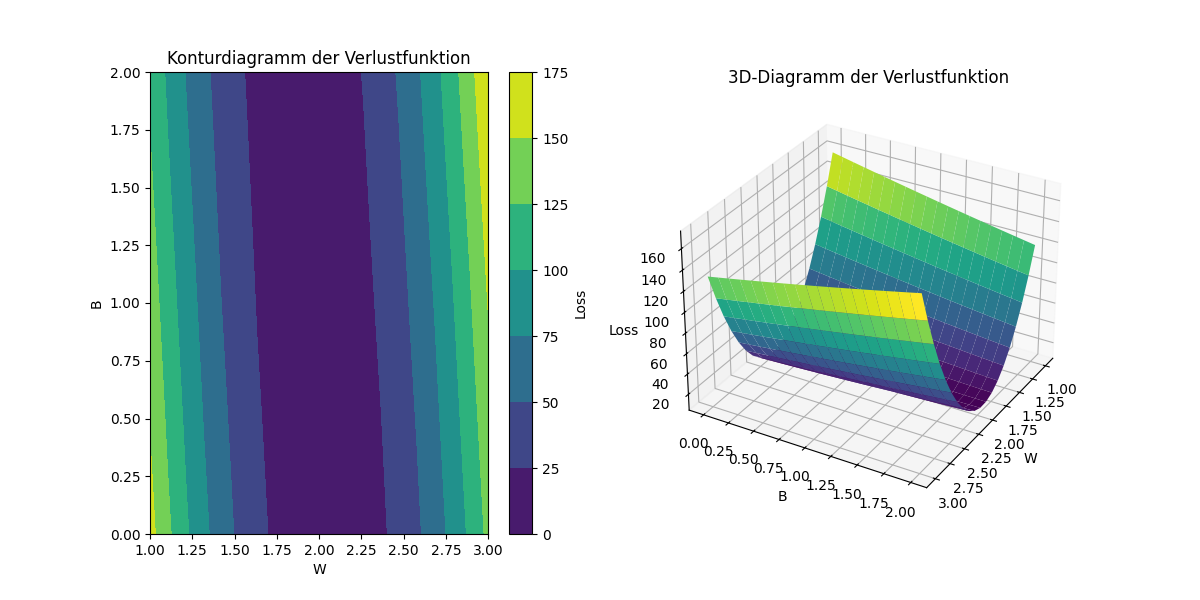

In [6]:
import matplotlib.pyplot as plt
import numpy as np

### Figure erstellen
fig = plt.figure(figsize=(12, 6))

### Zufällige Punkte generieren
n = 20
generator = np.random.default_rng(2948292983384)
random_array = 2 * np.linspace(0, 20, 20) + 1 + 10 * (generator.random((1,20)) - 0.5)
x = np.linspace(0, 20, 20)

### Verlustfunktion definieren
def mse(y_real, y_hat):
    return 1/y_real.shape[1] * np.sum((y_real[:, None].T - y_hat)**2, axis = 0)

### Vorhersage des Modells
def y_hat(w, b, inputs):
    return w * inputs[:,None, None] + b

### Parameterraum definieren
W, B = np.meshgrid(np.linspace(1, 3, n), np.linspace(0, 2, n))

### Verlustfunktion berechnen
Z = mse(random_array, y_hat(W, B, x))

### Verlustfunktion als Konturdiagramm zeichnen
ax = fig.add_subplot(121)
contours = ax.contourf(W, B, Z)
cbar = fig.colorbar(contours)
cbar.set_label('Loss')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_title('Konturdiagramm der Verlustfunktion')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
ax.view_init(30, 30)
ax.set_title('3D-Diagramm der Verlustfunktion')

plt.show()

### Interaktives Widget: Verlustlandschaft erkunden  

Um besser zu verstehen, wie die Verlustfunktion von den Parametern $w$ und $b$ abhängt, können Sie diese Werte im folgenden Widget selbst anpassen.  

**So funktioniert es:**  
- Verwenden Sie die **Regler**, um die Werte von $w$ (Gewicht) und $b$ (Bias) zu ändern.  
- Jede Kombination von $w$ und $b$ bestimmt eine **Gerade**, die die Trainingsdaten mehr oder weniger gut beschreibt.  
- Der **MSE-Wert** wird in Echtzeit berechnet – ein niedriger Wert bedeutet, dass die Gerade gut zu den Daten passt.  

**Ihre Aufgabe:**  
- Führen Sie die nachfolgende Zelle aus und experimentieren Sie mit den Parametern. Versuchen Sie, den MSE-Wert **so klein wie möglich** zu machen.  
- Ihre Änderungen färben nach und nach die Karte mit einer Farbe, die der Höhe des Loss-Wertes entspricht, ein und geben so eine Annäherung an das obige Konturdiagramm.
- Das Widget kann auch mit anderen Werten für $n$ gestartet werden. Je größer $n$ gewählt wird, desto genauer kann die Näherung des Konturplots werden.


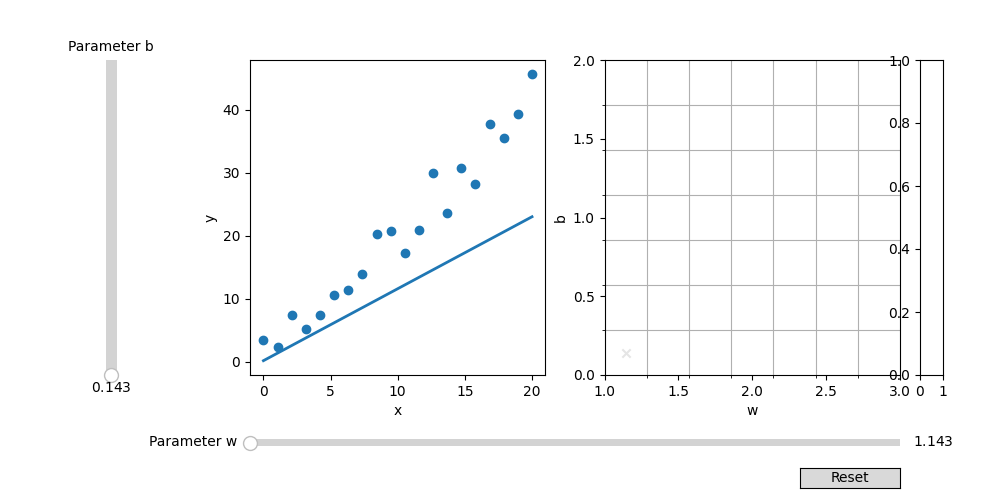

In [7]:
%matplotlib ipympl
from MSE_Interactive import InteractivePlot
my_plot = InteractivePlot(n=8)
my_plot()

### Warum Gradient Descent?  

Bevor wir uns anschauen, _wie_ wir die Gradienten der Verlustfunktion $\mathcal{L}$ nach $w$ und $b$ berechnen, sollten wir uns zunächst fragen: _Warum_ tun wir das überhaupt?  

Die Motivation hinter Gradient Descent ist es, die optimalen Gewichte zu finden, die unsere Verlustfunktion minimieren. Die grundlegende Idee ist simpel:  

1. Wir starten an einem beliebigen Punkt im Parameterraum, z. B. $(w_0, b_0)$.  
2. An diesem Punkt berechnen wir den Gradienten der Verlustfunktion nach $w$ und $b$.  
   Der Gradient zeigt in die Richtung des steilsten Anstiegs der Funktion (Definition der Ableitung).
3. Um das Minimum der Funktion zu finden, müssen wir in die entgegengesetzte Richtung des Gradienten gehen. Das heißt, wir ziehen den Gradienten von unserem aktuellen Punkt ab. Unsere allgemeine Update-Regel ist also: 

$$
 \begin{pmatrix} w_1 \\ b_1\end{pmatrix} = \begin{pmatrix} w_0 \\ b_0\end{pmatrix} - \eta \cdot \nabla \mathcal{L} = \begin{pmatrix} w_0 \\ b_0\end{pmatrix} - \eta \cdot \begin{pmatrix} \frac{\partial \mathcal{L}}{\partial W} \\ \frac{\partial \mathcal{L}}{\partial b} \end{pmatrix}
$$

Hierbei ist **$\eta$ (eta)** die sogenannte _Lernrate_ (_learning rate_). Sie bestimmt, wie groß die Schritte sind, die wir in Richtung des Minimums gehen und ist ein wesentlicher Faktor in der Bestimmung der Konvergenzgeschwindigkeit des Algorithmus:
- Ist $\eta$ zu groß, springen wir möglicherweise am Minimum vorbei.  
- Ist $\eta$ zu klein dauert die Konvergenz unnötig lange.  

Diesen Prozess wiederholen wir so lange, bis sich die Verlustfunktion nicht mehr wesentlich verändert – das bedeutet, dass weitere Berechnungen keine wesentliche Verbesserung mehr bringen.  

### Interaktives Widget: Gradient Descent in Aktion  

Das folgende Widget zeigt den "Weg", den der Gradient Descent Algorithmus in unserem Beispiel nehmen würde:  

- Die roten Pfeile zeigen die ersten fünf Iterationen des Algorithmus, also die Schritte, die in Richtung Minimum genommen werden.  
- Auf der linken Seite wird dargestellt, wie sich der Loss-Wert über die Iterationen verändert.  
- Mit den Reglern können  
    1. Der _Startpunkt_ gewählt werden. Bestimmen Sie den Ausgangswert für $w_0$ und $b_0$.  
    2. Die Lernrate verändert werden. Passen Sie $\eta$ an und beobachten Sie, wie sich die Konvergenz verändert.  

- **Experimentieren Sie mit verschiedenen Einstellungen** und beobachten Sie, wie der Algorithmus sich verhält!  

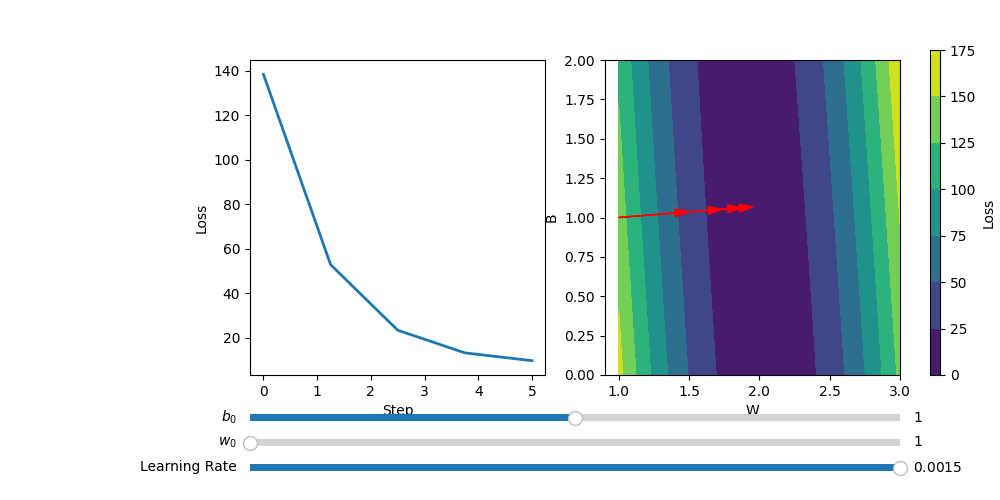

In [4]:
%matplotlib ipympl
from GradientDescentWidget import GradientDescentWidget
gd = GradientDescentWidget()
gd()

### Gradient Descent – Ein Rechenbeispiel

Wir wollen nun die Funktionsweise des Gradient Descent Algorithmus anhand eines konkreten Rechenbeispiels erläutern.  

Unsere Vorhersage $\hat{y}$ ergibt sich aus der linearen Kombination:
$$ z = W \cdot x + b $$
und der anschließenden Anwendung der Aktivierungsfunktion $f$:
$$ \hat{y} = f(z) = f(W \cdot x + b) $$

Die Verlustfunktion $\mathcal{L}(\hat{y})$ für einen einzelnen Datenpunkt $(x, y)$ ist unsere Mean-Squared-Error-Funktion:
$$ \mathcal{L} = \frac{1}{2}(\hat{y} - y)^2 $$

Nun wollen wir wissen, wie sich diese Verlustfunktion mit den Parametern $W$ und $b$ ändert, also wir möchten die partiellen Ableitungen der Verlustfunktion bezüglich $W$ und $b$ berechnen, um den Gradienten $\nabla \mathcal{L} = \begin{pmatrix} \frac{\partial \mathcal{L}}{\partial W} & \frac{\partial \mathcal{L}}{\partial b} \end{pmatrix}^\top$ zu finden.

### Berechnung des Gradienten  

#### 1. Partielle Ableitung bezüglich $W$  

$\mathcal{L} = \frac{1}{2}(\hat{y} - y)^2$ ist eine Funktion von $\hat{y}$, während $\hat{y} = f(z)$ eine Funktion von $z$ ist. Und erst $z = W x + b$ ist direkt abhängig von $W$ und $b$. Wir haben hier also eine ziemlich verkettete Funktion $\mathcal{L}(\hat{y}(z))$. Für $\frac{\partial \mathcal{L}}{\partial W}$ gilt daher nach der Kettenregel:
$$
\frac{\partial \mathcal{L}}{\partial W} = \underbrace{\frac{\partial \mathcal{L}}{\partial \hat{y}}}_{1} \cdot \underbrace{\frac{\partial \mathcal{\hat{y}}}{\partial z}}_{2} \cdot \underbrace{\frac{\partial \mathcal{z}}{\partial W}}_{3}
$$  

- **Faktor 1**: $\frac{\partial \mathcal{L}}{\partial \hat{y}} = \hat{y} - y$  
- **Faktor 2**: Für eine lineare Aktivierungsfunktion $f(z) = z$ folgt $\frac{\partial \mathcal{\hat{y}}}{\partial z} = 1$.  
- **Faktor 3**: $\frac{\partial \mathcal{z}}{\partial W} = x$.  

Daraus ergibt sich:
$$
\frac{\partial \mathcal{L}}{\partial W} = (\hat{y} - y) \cdot x
$$

Für alle Trainingsdaten $(x_i, y_i)$ mit $i \in \{1, \dots, N\}$ ergibt sich die summierte Ableitung:
$$
\frac{\partial \mathcal{L}}{\partial W} = \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot x_i
$$

#### 2. Partielle Ableitung bezüglich $b$  

Analog dazu ergibt sich für $\frac{\partial \mathcal{L}}{\partial b}$:
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \mathcal{\hat{y}}}{\partial z} \cdot \frac{\partial \mathcal{z}}{\partial b} = \sum_{i}^N (\hat{y}_i - y_i)
$$

---

### Konkretes Rechenbeispiel

Nehmen wir an, unsere Trainingsdaten sind:
$$ \vec{x} = \begin{pmatrix} 0 & 1 & 2 \end{pmatrix}, \quad \vec{y} = \begin{pmatrix} 1 & 1.5 & 4 \end{pmatrix} $$

Wir wählen anfängliche Werte für die Parameter: $W_0 = 1$ und $b_0 = 0$. Unsere Lernrate ist $\eta = 0.05$.  

#### 1. Berechnung der Gradienten  

Berechnen wir nun den Gradienten $\frac{\partial \mathcal{L}}{\partial W} = \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot x_i$ für die gegebene Trainingsmenge.  

Für jedes $i$ berechnen wir die Vorhersage $\hat{y}_i$ und dann den Fehler $(\hat{y}_i - y_i)$. Für die gegebene Datenmenge erhalten wir:

- Für $x_1 = 0$: 
    - $\hat{y}_1 = W_0 \cdot 0 + b_0 = 1 \cdot 0 + 0 = 0$
    - $(\hat{y}_1 - y_1) = 0 - 1 = -1$  
- Für $x_2 = 1$:
    - $\hat{y}_2 = W_0 \cdot 1 + b_0 = 1 \cdot 1 + 0 = 1$
    - $(\hat{y}_2 - y_2) = 1 - 1.5 = -0.5$  
- Für $x_3 = 2$: 
    - $\hat{y}_3 = W_0 \cdot 2 + b_0 = 1 \cdot 2 + 0 = 2$
    - $(\hat{y}_3 - y_3) = 2 - 4 = -2$

Nun berechnen wir den Gradienten durch Multiplikation dieser Werte mit $x_i$:
$$
\frac{\partial \mathcal{L}}{\partial W} = (-1 \cdot 0) + (-0.5 \cdot 1) + (-2 \cdot 2) = -0 - 0.5 - 4 = -4.5
$$

Analog dazu für den Gradient bezüglich $b$ (gerne selber nachrechnen):
$$
\frac{\partial \mathcal{L}}{\partial b} = (-1) + (-0.5) + (-2) = -3.5
$$

#### 2. Update der Parameter  

Nun verwenden wir die Update-Regel, um die neuen Werte $W_1$ und $b_1$ zu berechnen:
$$
\begin{pmatrix} W_1 \\ b_1 \end{pmatrix} = \begin{pmatrix} W_0 \\ b_0 \end{pmatrix} - \eta \cdot \nabla \mathcal{L}
$$
$$
\begin{pmatrix} W_1 \\ b_1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} - 0.05 \cdot \begin{pmatrix} -4.5 \\ -3.5 \end{pmatrix} = \begin{pmatrix} 1.225 \\ 0.175 \end{pmatrix}
$$

Und das sind unsere neuen Schätzungen nach der ersten Iteration!
\
Der folgende Plot, veranschaulicht die Veränderung der Gerade durch den Gradient-Descent-Algorithmus. Er zeigt die Gerade (rot), die durch die initiale Schätzung der Gewichte $W_0 = 1$ und $b_0 = 0$ definiert wird, welche zunächst nicht allzu gut zu den Trainingsdaten passt. Nach der ersten Iteration des Gradient Descent Algorithmus, bei der die Gewichte auf $W_1 = 1.225$ und $b_1 = 0.175$ angepasst wurden, liegt die grüne Gerade vor. Hier ist bereits eine kleine Verbesserung sichtbar, da die Gerade näher an den Datenpunkten liegt.

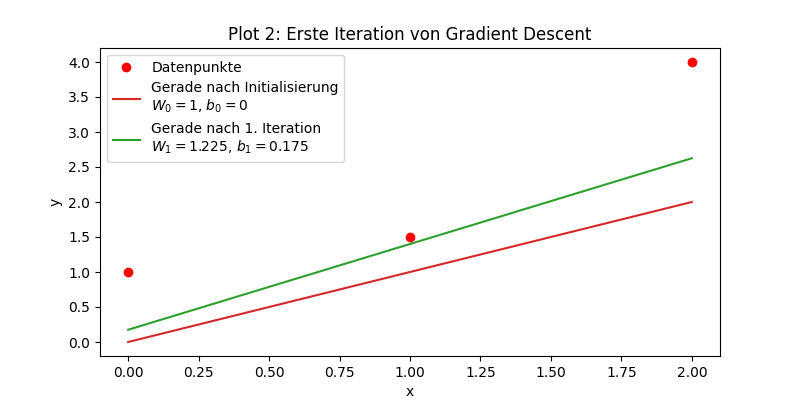

In [17]:
# Trainingsdaten
x = np.array([0, 1, 2])
y = np.array([1, 1.5, 4])

# Initiale Schätzung von W und b
W_0 = 1
b_0 = 0

# Vorhersage mit der initialen Schätzung
y_pred_0 = W_0 * x + b_0

# Gradientenberechnungen
# Fehler: y_pred - y
y_diff = y_pred_0 - y

# Gradient der Verlustfunktion
dL_dW = np.sum(y_diff * x)  # Gradient bezüglich W
dL_db = np.sum(y_diff)      # Gradient bezüglich b

# Lernrate
eta = 0.05

# Berechnung der neuen Gewichte nach der ersten Iteration
W_1 = W_0 - eta * dL_dW
b_1 = b_0 - eta * dL_db

# Vorhersage nach der ersten Iteration
y_pred_1 = W_1 * x + b_1

# Plot 2: Mit der ersten Iteration
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'ro', label='Datenpunkte')
plt.plot(x, y_pred_0, label=f'Gerade nach Initialisierung\n$W_0={W_0}$, $b_0={b_0}$', color='tab:red')
plt.plot(x, y_pred_1, label=f'Gerade nach 1. Iteration\n$W_1={W_1:.3f}$, $b_1={b_1:.3f}$', color='tab:green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Plot 2: Erste Iteration von Gradient Descent')
plt.show()


#### 3. Ergebnisse der nächsten Iterationen  
Für die nächsten Iterationen werden die gleichen Schritte nochmals durchgeführt. Insgesamt ergibt sich folgende für die folgenden Iterationen diese Tabelle:

| Iteration | $W_i$ | $b_i$ | $Loss_i$ |
|-----------|-----------|-----------|-----------|
| 1         | 1.225     | 0.175     | 1.291     |
| 2         | 1.368     | 0.290     | 0.739     |
| 3         | 1.457     | 0.366     | 0.512     |
| 4         | 1.512     | 0.418     | 0.417     |
| 5         | 1.547     | 0.453     | 0.377     |
| 6         | 1.567     | 0.478     | 0.359     |
| 7         | 1.578     | 0.496     | 0.352     |
| 8         | 1.584     | 0.510     | 0.348     |
| 9         | 1.587     | 0.521     | 0.346     |
| 10        | 1.587     | 0.529     | 0.345     |
| ...       | ...       | ...       | ...       |
| 200        | 1.500     | 0.666     | 0.333    |

Wie man sieht, ist der Gradient Descent Algorithmus nach 10 Iterationen bereits recht nah am endgültigen Ergebnis.
Grafisch sieht das Ganze dann übrigens so aus:

<center><iframe src="https://drive.google.com/file/d/1fkwTnC7iVeV500AG9S2doWNXKykUCwnm/preview" width="640" height="480"></iframe></center>

### Zusammenfassung des Notebooks

In diesem Notebook haben wir uns intensiv mit dem Thema neuronale Netze beschäftigt, insbesondere mit dem Single Layer Perceptron (SLP). Hier sind die wichtigsten Punkte, die wir behandelt haben:

1. **Einführung in Neuronale Netze**:
    - Neuronale Netze sind in der Lage, komplexe Zusammenhänge aus Daten zu lernen und werden in zahlreichen Anwendungen eingesetzt.
    - Sie sind eine Verallgemeinerung von linearen Modellen auf nichtlineare Zusammenhänge.

2. **Das Perzeptron**:
    - Das Perzeptron ist das einfachste Modell eines künstlichen Neurons und wurde 1958 von Frank Rosenblatt entwickelt.
    - Es kann genutzt werden, um auf Basis von Eingaben binäre Entscheidungen zu treffen.

3. **Gewichte und Bias**:
    - Inputs werden mit Gewichten multipliziert, die lernbar sind und sich im Lernprozess verändern.
    - Der Bias-Term wird hinzugefügt, um die Einschränkung zu überwinden, dass die Entscheidungslinie immer durch den Ursprung gehen muss.

4. **Aktivierungsfunktion**:
    - Aktivierungsfunktionen bestimmen, wie der finale Output des Perzeptrons basierend auf der gewichteten Summe erzeugt wird.
    - Beispiele sind die Stufenfunktion und die Sigmoid-Funktion.

5. **Lineare Separierbarkeit**:
    - Ein SLP kann nur Probleme lösen, die linear separierbar sind.
    - Nicht linear separierbare Probleme erfordern komplexere Modelle.

6. **Gradient Descent - Wie Neuronale Netze Lernen**:
    - Gradient Descent ist ein Algorithmus, der es erlaubt, den Gradienten einer Funktion zu nutzen, um iterativ ihr Minimum zu finden.
    - Wir haben die Verlustfunktion und ihre Bedeutung für das Training des Modells besprochen.

7. **Verlustlandschaft**:
    - Die Verlustlandschaft zeigt, wie sich die Verlustfunktion mit den Parametern verändert.
    - Wir haben ein Kontur- und ein 3D-Diagramm der Verlustfunktion erstellt.

8. **Interaktive Widgets**:
    - Wir haben interaktive Widgets verwendet, um die Verlustlandschaft zu erkunden und den Gradient Descent Algorithmus in Aktion zu sehen.

9. **Gradient Descent – Ein Rechenbeispiel**:
    - Wir haben ein konkretes Rechenbeispiel durchgeführt, um die Funktionsweise des Gradient Descent Algorithmus zu erläutern.
    - Die Berechnung der Gradienten und die Aktualisierung der Parameter wurden detailliert beschrieben.

Insgesamt haben wir die Grundlagen des Single Layer Perceptrons und des Gradient Descent Algorithmus behandelt und deren Anwendung in der Praxis demonstriert.